### Generalized Least Squares Lab

In this lab, you will fit a GLS model to a data set from the chemical and taste analysis of cheddar cheese. To begin, import the data set below.

In [1]:
load('cheddar.rda')
cheddar <- cheddar

We will then add a new column, `time`, to the data. 

In [2]:
cheddar$time <- 1: nrow(cheddar)

Now, fit a linear model predicting taste using data for `Acetic`, `H2S`, and `Lactic`. Save your model to `lmod`.

In [3]:
head(cheddar)

,taste,Acetic,H2S,Lactic,time
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,12.3,4.543,3.135,0.86,1
2,20.9,5.159,5.043,1.53,2
3,39.0,5.366,5.438,1.57,3
4,47.9,5.759,7.496,1.81,4
5,5.6,4.663,3.807,0.99,5
6,25.9,5.697,7.601,1.09,6


In [4]:
# YOUR CODE HERE

lmod <- lm(taste ~ Acetic + H2S + Lactic, data = cheddar)


summary(lmod)


Call:
lm(formula = taste ~ Acetic + H2S + Lactic, data = cheddar)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.390  -6.612  -1.009   4.908  25.449 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -28.8768    19.7354  -1.463  0.15540   
Acetic        0.3277     4.4598   0.073  0.94198   
H2S           3.9118     1.2484   3.133  0.00425 **
Lactic       19.6705     8.6291   2.280  0.03108 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.13 on 26 degrees of freedom
Multiple R-squared:  0.6518,	Adjusted R-squared:  0.6116 
F-statistic: 16.22 on 3 and 26 DF,  p-value: 3.81e-06


Now, plot the residuals from the model against time using `plot()`. What do you see? 

In [5]:
residuals(lmod)

1           2           3           4           5           6 
 10.5075519  -1.7373936  13.9627650   9.9624634  -1.4177049   1.7348312 
          7           8           9          10          11          12 
  4.7359918 -17.3905351   4.9359037   0.7512666   4.8224939  15.6552777 
         13          14          15          16          17          18 
 -4.4611800   8.1566913  25.4488561  -4.0427813   5.0869195 -14.1917289 
         19          20          21          22          23          24 
-11.0575814  -8.6067963  -0.5998680  -4.2412368  -5.3898768   4.2231851 
         25          26          27          28          29          30 
  3.8167124  -2.8149807  -7.8073558 -12.0607374  -7.0196297 -10.9615230

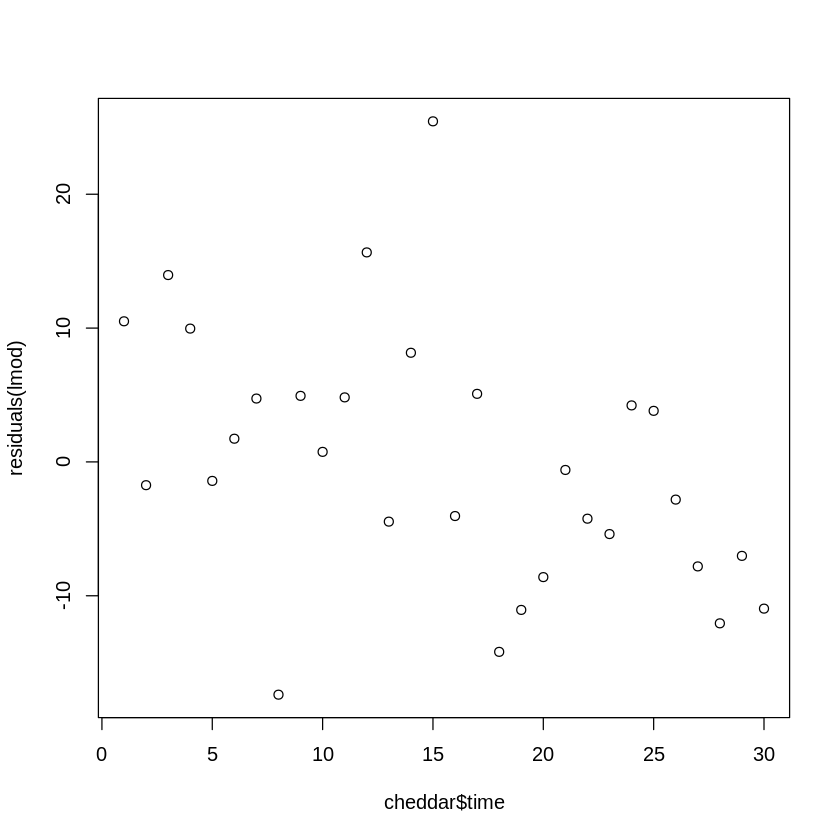

In [6]:
#YOUR CODE HERE

model_plot <- plot(y = residuals(lmod) , x= cheddar$time )


Finally, fit a GLS model using AR(1) correlation. Is there evidence of correlation between the errors? Calculate the confidence interval on that using the `intervals` function.

In [7]:
# YOUR CODE HERE

library(nlme)
glmod <- gls(taste ~ Acetic + H2S + Lactic, correlation = corAR1(form = ~ time) , data = cheddar)
glmod_intervals <- intervals(glmod, which = "var-cov")



summary(glmod)


Generalized least squares fit by REML
  Model: taste ~ Acetic + H2S + Lactic 
  Data: cheddar 
     AIC      BIC  logLik
  214.94 222.4886 -101.47

Correlation Structure: AR(1)
 Formula: ~time 
 Parameter estimate(s):
      Phi 
0.2641944 

Coefficients:
                 Value Std.Error   t-value p-value
(Intercept) -30.332472 20.273077 -1.496195  0.1466
Acetic        1.436411  4.876581  0.294553  0.7707
H2S           4.058880  1.314283  3.088284  0.0047
Lactic       15.826468  9.235404  1.713674  0.0985

 Correlation: 
       (Intr) Acetic H2S   
Acetic -0.899              
H2S     0.424 -0.395       
Lactic  0.063 -0.416 -0.435

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-1.64546468 -0.63861716 -0.06641714  0.52255676  2.41323020 

Residual standard error: 10.33276 
Degrees of freedom: 30 total; 26 residual

In [8]:
# your code here
